# Group 10 Project - Restaurant Rating using Zomato  

Sanchit Agrawal and Jennifer An

** Importing data science libraries pandas and numpy**

In [39]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read dataset
Data=pd.read_csv('E:/Project/Zomato/ZomatoData.csv')
print('Shape of the original dataset:\t\t', Data.shape)

#Drop duplicate rows if any
Data=Data.drop_duplicates()
print('Shape after deleting duplicate values:\t', Data.shape)

Shape of the original dataset:		 (9551, 19)
Shape after deleting duplicate values:	 (9551, 19)


** Check the head of the DataFrame. **

In [4]:
 Data.head(3)

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4


** Plot the basic target variable Rating.**

<AxesSubplot:>

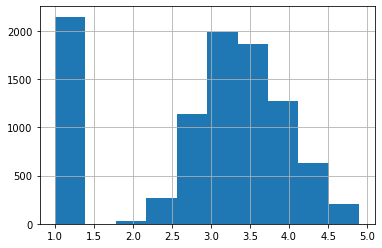

In [5]:
%matplotlib inline
d=Data['Rating']
# Creating Bar chart as the Target variable is Continuous
d.hist()

**Basic data exploration**

In [7]:
#Summarized information of data
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   RestaurantName        9551 non-null   object 
 2   CountryCode           9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   LocalityVerbose       9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has_Table_booking     9551 non-null   object 
 12  Has_Online_delivery   9551 non-null   object 
 13  Is_delivering_now     9551 non-null   object 
 14  Switch_to_order_menu  9551 non-null   object 
 15  Price_range          

In [8]:
#Descriptive statistics of the data
Data.describe(include='all')

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


In [9]:
#Finging unique value counts for each column
Data.nunique()

RestaurantID            9551
RestaurantName          7446
CountryCode               15
City                     141
Address                 8918
Locality                1208
LocalityVerbose         1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has_Table_booking          2
Has_Online_delivery        2
Is_delivering_now          2
Switch_to_order_menu       1
Price_range                4
Votes                   1012
Average_Cost_for_two     140
Rating                    33
dtype: int64

** Feature Engineering**

In [11]:
#Creating a function to count the number of cuisines
def cuisine_counter(inpStr):
    cuisinesCount=len(str(inpStr).split(','))
    return(cuisinesCount)

In [13]:
#Create a new feature in dataset
Data['CuisineCount']=Data['Cuisines'].apply(cuisine_counter)
Data.head()
df = Data.copy()
df

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,CuisineCount
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,Turkish Lira(TL),No,No,No,No,3,788,80,4.1,1
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",Turkish Lira(TL),No,No,No,No,3,1034,105,4.2,3
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",Turkish Lira(TL),No,No,No,No,4,661,170,3.7,2
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,Turkish Lira(TL),No,No,No,No,4,901,120,4.0,1


** Removing useless columns from the data**

In [15]:
#Deleting the columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['RestaurantID', 'RestaurantName','City','Address','Locality', 'LocalityVerbose','Currency','Switch_to_order_menu']
Data = Data.drop(UselessColumns,axis=1)
Data.head()

,CountryCode,Longitude,Latitude,Cuisines,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Votes,Average_Cost_for_two,Rating,CuisineCount
0,162,121.027535,14.565443,"French, Japanese, Desserts",Yes,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Japanese,Yes,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Yes,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,"Japanese, Sushi",No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,"Japanese, Korean",Yes,No,No,4,229,1500,4.8,2


Visual Exploratory Data Analysis **

In [16]:
#Plotting multiple bar charts at once for some categorical variables using customized function

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

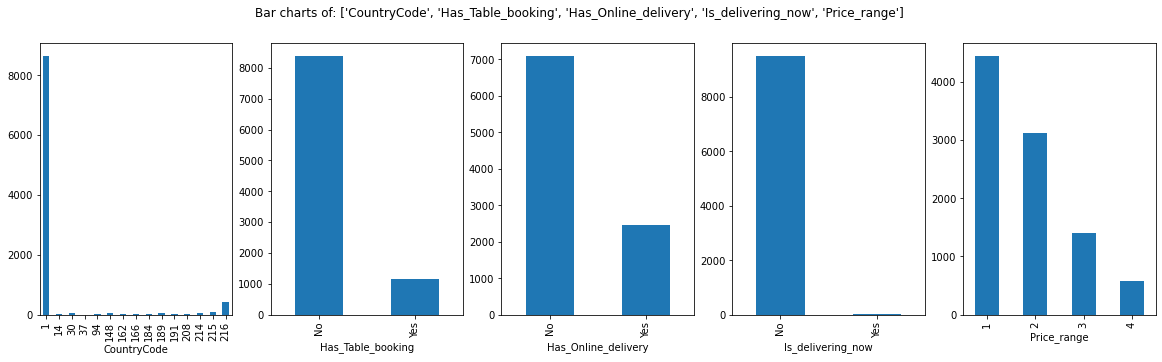

In [18]:
 # Calling the function
PlotBarCharts(inpData=Data, colsToPlot=['CountryCode', 'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now','Price_range'])

array([[<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'Average_Cost_for_two'}>]],
      dtype=object)

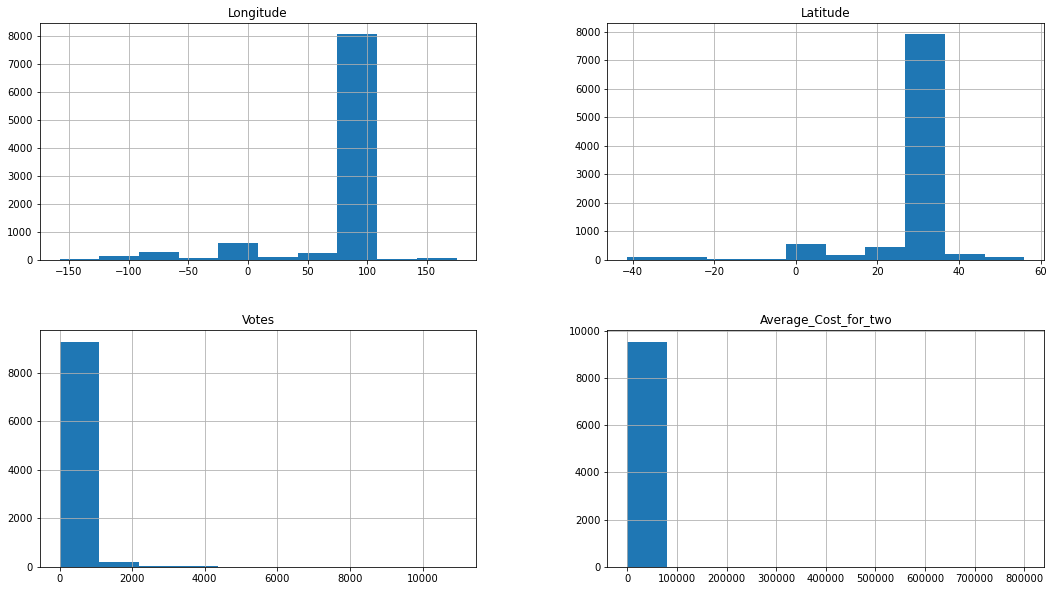

In [22]:
#Plotting histograms of multiple columns
Data.hist(['Longitude', 'Latitude','Votes', 'Average_Cost_for_two'], figsize=(18,10))

** Outlier treatment**

In [24]:
#Finding nearest values to 5000 mark
Data['Votes'][Data['Votes']<5000].sort_values(ascending=False)

4638    4986
3085    4914
4178    4689
2410    4464
1252    4385
        ... 
7226       0
7225       0
7223       0
7222       0
4781       0
Name: Votes, Length: 9539, dtype: int64

In [40]:
#Replacing outliers with nearest possibe value
Data['Votes'][Data['Votes']>5000] =4986

** Replacing outliers for 'Average Cost for two'

In [28]:
 # Finding nearest values to 50000 mark
Data['Average_Cost_for_two'][Data['Average_Cost_for_two']<50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
        ... 
85         0
87         0
240        0
397        0
9242       0
Name: Average_Cost_for_two, Length: 9530, dtype: int64

array([[<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'Average_Cost_for_two'}>]],
      dtype=object)

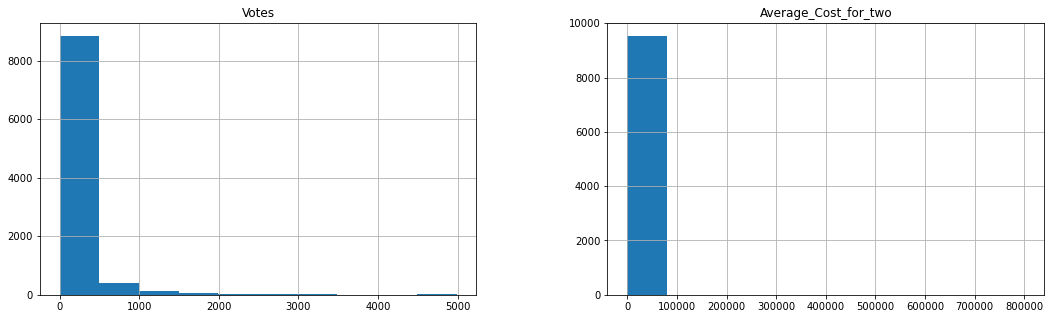

In [30]:
# Visualizing distribution after outlier treatment
Data.hist(['Votes', 'Average_Cost_for_two'], figsize=(18,5))

In [31]:
# Missing values treatment
Data.isnull().sum()

CountryCode             0
Longitude               0
Latitude                0
Cuisines                9
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Price_range             0
Votes                   0
Average_Cost_for_two    0
Rating                  0
CuisineCount            0
dtype: int64

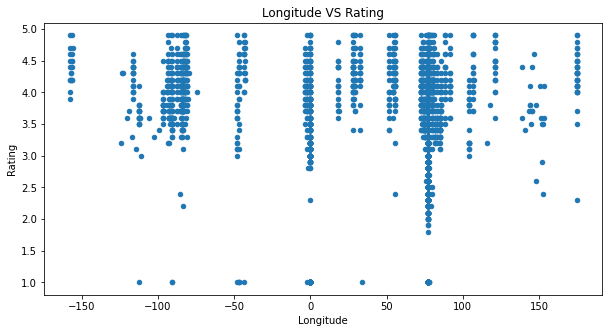

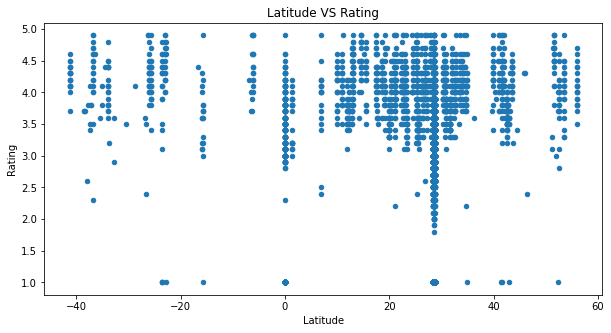

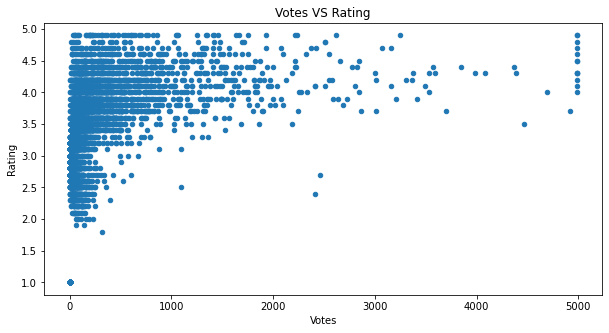

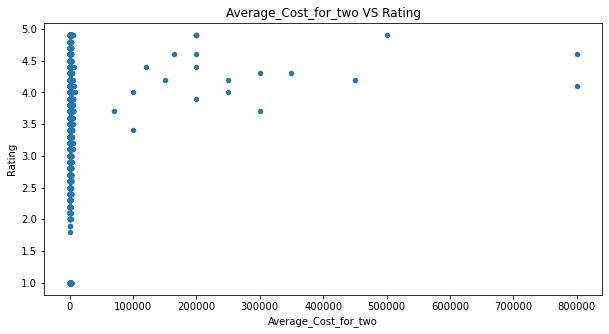

In [32]:
#Relationship exploration
ContinuousCols=['Longitude', 'Latitude', 'Votes', 'Average_Cost_for_two']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    Data.plot.scatter(x=predictor, y='Rating', figsize=(10,5), title=predictor+" VS "+ 'Rating')



In [34]:
#Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
#Calculating correlation matrix
ContinuousCols=['Rating','Longitude', 'Latitude', 'Votes', 'Average_Cost_for_two']

#Creating the correlation matrix
CorrelationData=Data[ContinuousCols].corr()
CorrelationData

,Rating,Longitude,Latitude,Votes,Average_Cost_for_two
Rating,1.000000,-0.145930,-0.019806,0.372520,0.058957
Longitude,-0.145930,1.000000,0.043207,-0.094985,0.045891
Latitude,-0.019806,0.043207,1.000000,-0.020587,-0.111088
Votes,0.372520,-0.094985,-0.020587,1.000000,0.073908
Average_Cost_for_two,0.058957,0.045891,-0.111088,0.073908,1.000000


In [35]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['Rating'][abs(CorrelationData['Rating']) > 0.2 ]

Rating    1.00000
Votes     0.37252
Name: Rating, dtype: float64

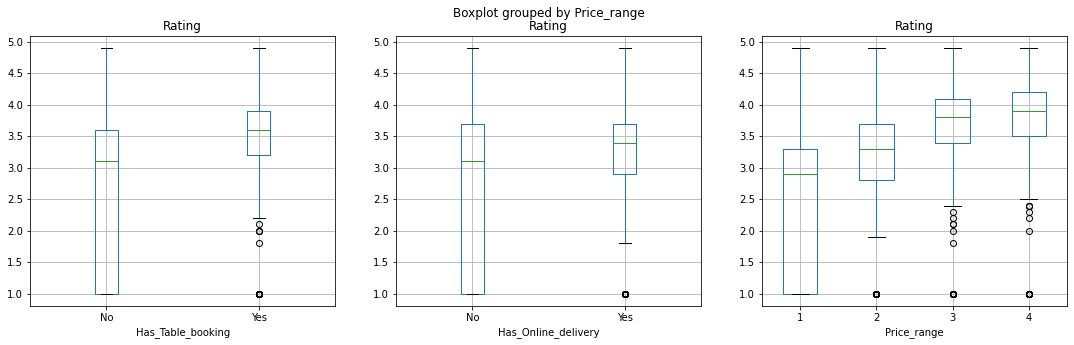

In [36]:
# Box plots for Categorical Target Variable "Rating" and continuous predictors
CategoricalColsList=['Has_Table_booking', 'Has_Online_delivery', 'Price_range']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Rating"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    Data.boxplot(column='Rating', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [37]:
#Selecting final predictors for Machine Learning 
SelectedColumns=['Votes','Average_Cost_for_two','Has_Table_booking','Has_Online_delivery','Price_range']

DataForML=Data[SelectedColumns]
DataForML.head()

,Votes,Average_Cost_for_two,Has_Table_booking,Has_Online_delivery,Price_range
0,314,1100,Yes,No,3
1,591,1200,Yes,No,3
2,270,4000,Yes,No,4
3,365,1500,No,No,4
4,229,1500,Yes,No,4


In [38]:
DataForML.dtypes

Votes                    int64
Average_Cost_for_two     int64
Has_Table_booking       object
Has_Online_delivery     object
Price_range              int64
dtype: object

In [41]:
# Converting the binary nominal variable to numeric
DataForML['Has_Table_booking'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Has_Online_delivery'].replace({'Yes':1, 'No':0}, inplace=True)

In [42]:
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Rating']=Data['Rating']

# Printing sample rows
DataForML_Numeric.head()

,Votes,Average_Cost_for_two,Has_Table_booking,Has_Online_delivery,Price_range,Rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8


*** Converting the binary nominal variable to numeric using 1/0 mapping

Machines Learning: splitting the data

In [75]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Votes', 'Average_Cost_for_two', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Rating'],
      dtype='object')

In [76]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'
Predictors=['Votes', 'Average_Cost_for_two', 'Has_Table_booking',
           'Has_Online_delivery', 'Price_range']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [77]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6685, 5)
(6685,)
(2866, 5)
(2866,)


In [99]:
#Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

LinearRegression()


In [101]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

#Calculating the avg % error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
Accuracy =100 - MAPE
print('Accuracy on test data:', Accuracy)

Mean Accuracy on test data: 55.6498761486498
Median Accuracy on test data: 73.17073170731707


In [105]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction_DT=DT.predict(X_test)

DecisionTreeRegressor(max_depth=6)


In [106]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction_DT)

# Calculating the avg % error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 92.05947336603006
Median Accuracy on test data: 93.75


In [107]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction_RF=RF.predict(X_test)

RandomForestRegressor(max_depth=2, n_estimators=400)


In [108]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction_RF)

# Calculating the avg % error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 91.47102378661904
Median Accuracy on test data: 93.75


In [109]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction_KNN=KNN.predict(X_test)

KNeighborsRegressor(n_neighbors=3)


In [110]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction_KNN)

# Calculating the avg % error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 90.83840564638925
Median Accuracy on test data: 93.75


In [111]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=5, kernel='rbf', degree=20, gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction_SVM=SVM.predict(X_test)

SVR(C=5, degree=20, gamma=0.01)


In [112]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction_SVM)

# Calculating the avg % error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

Mean Accuracy on test data: 88.64274891996688
Median Accuracy on test data: 93.0232558139535


In [ ]:
#Inferences and Conclusions

#I’ve drawn many inferences from the survey. Here’s a summary of a few of them:

#1. The dataset is skewed towards India and doesn't represent the complete data of restaurants worldwide.
#2. There is no relation between cost and rating. Some of the best rated restaurants are low on cost and vice versa.